<a href="https://colab.research.google.com/github/bruckman/Gamma_Factory/blob/main/2D_conditional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

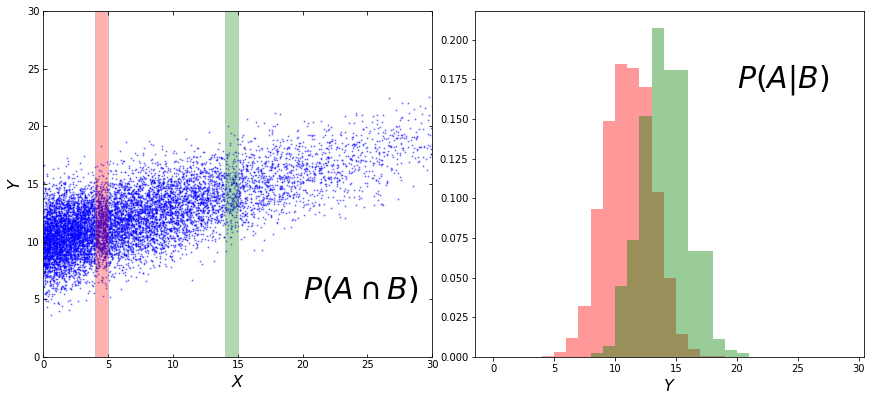

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

# Fixing random state for reproducibility
np.random.seed(19680801)

def gauss(x, mu, sigma):
    return 1/(np.sqrt(2*np.pi)*sigma) * np.exp(-(x-mu)*(x-mu)/(2*sigma*sigma))

def decay(x, tau):
    return np.exp(-x/tau) / tau

xlow = 0
xhig = 30
sscale = 10
mu = 10
sigma = 2.0
tau = 8.0

N = 10000
nlin = 1000
# the random data
x = np.linspace(xlow, xhig, nlin)
#y = np.linspace(xlow, xhig, nlin)
xx = decay(x, tau)
yy = gauss(x, mu, sigma)

normx = 0
for k in xx:
  normx = normx + k

normy = 0
for k in yy:
  normy = normy + k

  
xxx0 = np.random.choice(x, N, p=xx/normx)
yyy0 = np.random.choice(x, N, p=yy/normy)


# transformation:
delta = 0.0
x0 =  xxx0
y0 =  yyy0 +xxx0*0.3


# slices (conditional):
y1=[]
y2=[]
for k in range(len(x0)):
  if x0[k]>3 and x0[k]<5:
    y1.append(y0[k])
  if x0[k]>13 and x0[k]<15:
    y2.append(y0[k])


# definitions for the axes
left, width = 0.1, 0.45
bottom, height = 0.1, 0.80
offset = 0.5


rect_scatter = [left, bottom, width, height]
rect_hist = [left+offset, bottom, width, height]

# set up a figure
fig = plt.figure(figsize=(12,6))


ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_hist = plt.axes(rect_hist)
#ax_hist.tick_params(direction='in', labelbottom=False)

# the scatter plot:
ax_scatter.scatter(x0, y0, s=1.0, color='blue', alpha=0.4)


# now determine nice limits by hand:
binwidth = 1.0
ax_scatter.set_xlim((xlow, xhig))
ax_scatter.set_ylim((xlow, xhig))

# Make the shaded regions
verts = [(4, 0), (4,30), (5,30),(5, 0)]
poly = Polygon(verts, closed=True, facecolor='red', edgecolor='0.5', alpha=0.3)
ax_scatter.add_patch(poly)

verts = [(14, 0), (14,30), (15,30),(15, 0)]
poly = Polygon(verts, closed=True, facecolor='green', edgecolor='0.5', alpha=0.3)
ax_scatter.add_patch(poly)

ax_scatter.text(20, 5, r"$P(A\cap B)$",horizontalalignment='left', fontsize=30)


bins = np.arange(xlow, xhig, binwidth)
ax_hist.hist(y1, bins=bins, color='red', alpha=0.4, density=True)
ax_hist.hist(y2, bins=bins, color='green', alpha=0.4, density=True)

ax_hist.text(20, 0.17, r"$P(A | B)$",horizontalalignment='left', fontsize=30)

ax_scatter.set_xlabel('$X$', fontsize=16)
ax_scatter.set_ylabel('$Y$', fontsize=16)

ax_hist.set_xlabel('$Y$', fontsize=16)

plt.savefig("Conditional_2D_scatter.png", dpi=150)

plt.show()



In [ ]:
from google.colab import drive
drive.mount('/content/drive')